In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as helper
import random
import time

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
helper.walk_through_dir("10_food_classes_10_percent/")

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [5]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

tf.random.set_seed(42)
tf.device(tf.config.list_physical_devices()[0])

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)   

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
class_names = list(train_data_10_percent.class_names)

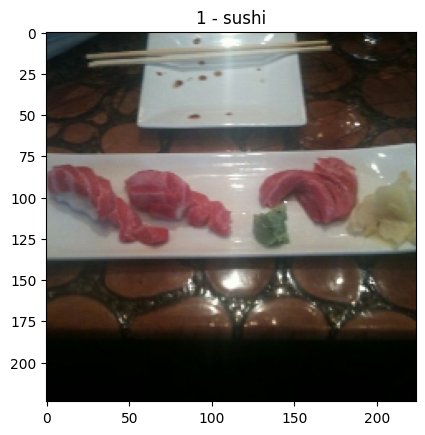

In [7]:
count = 0
for images, labels in train_data_10_percent.take(1):
    for image, label in zip(images, labels):
        count += 1
        plt.imshow(image/255.)
        plt.title(str(count) + " - " + class_names[label.numpy().argmax()])
        plt.show();
        break

In [7]:
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(inputs)

x = base_model(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

history_0 = model_0.fit(
    train_data_10_percent,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[helper.create_tensorboard_callback(dir_name="05_transfer_learning_fine_tuning", experiment_name="model_0_10_percent")]
)

Shape after passing inputs through base model: (None, 7, 7, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)
Saving TensorBoard log files to: 05_transfer_learning_fine_tuning/model_0_10_percent/20240112-205438
Epoch 1/10
24/24 [==============================] - 26s 949ms/step - loss: 1.8514 - accuracy: 0.4213 - val_loss: 1.1710 - val_accuracy: 0.7303
Epoch 2/10
24/24 [==============================] - 21s 905ms/step - loss: 1.0427 - accuracy: 0.7547 - val_loss: 0.7764 - val_accuracy: 0.7977
Epoch 3/10
24/24 [==============================] - 20s 827ms/step - loss: 0.7726 - accuracy: 0.8027 - val_loss: 0.6404 - val_accuracy: 0.8191
Epoch 4/10
24/24 [==============================] - 20s 826ms/step - loss: 0.6365 - accuracy: 0.8360 - val_loss: 0.5508 - val_accuracy: 0.8339
Epoch 5/10
24/24 [==============================] - 20s 829ms/step - loss: 0.5706 - accuracy: 0.8467 - val_loss: 0.5129 - val_accuracy: 0.8503
Epoch 6/10
24/24 [==============================] - 20s 823ms/step - 

In [8]:
model_0.evaluate(test_data)

79/79 [==============================] - 35s 447ms/step - loss: 0.4162 - accuracy: 0.8708


[0.41623735427856445, 0.8708000183105469]

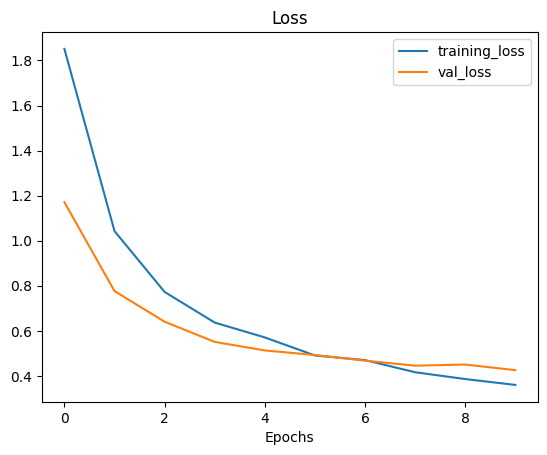

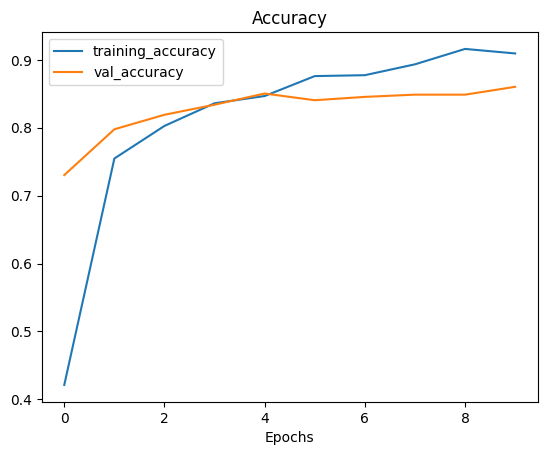

In [9]:
helper.plot_loss_curves(history_0)

In [10]:
base_model.summary()

Model: "efficientnetv2-b3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 40)       1080      ['normalizatio

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Functio  (None, None, None, 1536   12930622  
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1536)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                15370     
                                                                 
Total params: 12945992 (49.39 MB)
Trainable params: 15370 (60.04 KB)
Non-trainable params: 12930622 (49.33 MB)
________________

## Testing Global Average Pooling 2D layer

In [12]:
input_shape = (1, 2, 3, 4)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of global average pooled 2D tensor: {global_average_pooled_tensor.shape}")
print(f"Average value of the global average pooled 2D tensor: {tf.reduce_mean(global_average_pooled_tensor)}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337  -1.4075519 ]
   [-2.3880599  -1.0392479  -0.5573232   0.539707  ]
   [ 1.6994323   0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144  0.8504023 ]
   [-0.40604794 -3.0258412   0.9058464   0.29855987]
   [-0.22561555 -0.7616443  -1.891714   -0.9384712 ]]]]

2D global average pooled random tensor:
 [[-0.26500773 -1.216256   -0.55846834 -0.15365022]]

Shape of input tensor: (1, 2, 3, 4)
Shape of global average pooled 2D tensor: (1, 4)
Average value of the global average pooled 2D tensor: -0.5483455657958984


In [13]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.26500773, -1.216256  , -0.55846834, -0.15365022]],
      dtype=float32)>

In [14]:
train_dir_1_percent = "10_food_classes_1_percent/train/"

In [15]:
helper.walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.


In [16]:

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_1_percent,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

Found 70 files belonging to 10 classes.


In [17]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name="data_augmentation")

In [24]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = data_augmentation(inputs, training=True)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data,
    validation_steps=int(0.1 * len(test_data)),
    callbacks=[helper.create_tensorboard_callback(dir_name="05_transfer_learning_fine_tuning", experiment_name="model_1_percent")]
)


Saving TensorBoard log files to: 05_transfer_learning_fine_tuning/model_1_percent/20240112-212140
Epoch 1/10
3/3 [==============================] - 11s 3s/step - loss: 2.5208 - accuracy: 0.0571 - val_loss: 2.2536 - val_accuracy: 0.1741
Epoch 2/10
3/3 [==============================] - 6s 3s/step - loss: 2.2019 - accuracy: 0.1429 - val_loss: 2.1477 - val_accuracy: 0.1920
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.9927 - accuracy: 0.2857 - val_loss: 2.0360 - val_accuracy: 0.2946
Epoch 4/10
3/3 [==============================] - 6s 3s/step - loss: 1.8624 - accuracy: 0.4429 - val_loss: 1.9510 - val_accuracy: 0.3571
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 1.6801 - accuracy: 0.5429 - val_loss: 1.8907 - val_accuracy: 0.4286
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.6273 - accuracy: 0.4714 - val_loss: 1.8449 - val_accuracy: 0.4152
Epoch 7/10
3/3 [==============================] - 6s 3s/step - loss: 1.4981 - a

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 40s 502ms/step - loss: 1.4985 - accuracy: 0.5868


[1.4985132217407227, 0.5867999792098999]

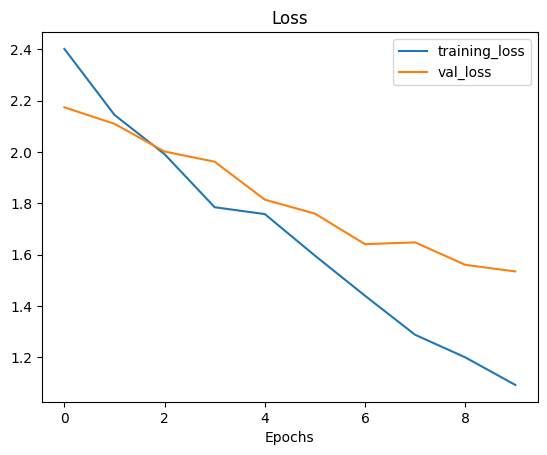

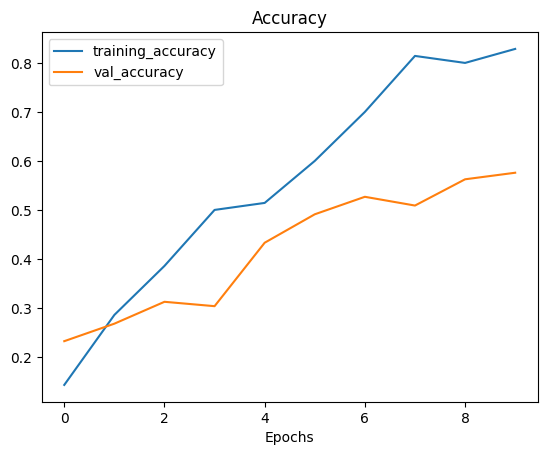

In [20]:
helper.plot_loss_curves(history_1_percent)

In [34]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_10_percent,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.


Found 2500 files belonging to 10 classes.


In [35]:
checkpoint_path = "checkpoints/model_2/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    save_freq="epoch",
    verbose=1
)

In [36]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
EPOCHS = 5

base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)
base_model.trainable = False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name="data_augmentation")

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = data_augmentation(inputs, training=True)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data_10_percent,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[helper.create_tensorboard_callback("05_transfer_learning_fine_tuning", "model_2_10_percent_data_aug"), checkpoint_callback]
)

Saving TensorBoard log files to: 05_transfer_learning_fine_tuning/model_2_10_percent_data_aug/20240112-230811
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.8918 - accuracy: 0.4053
Epoch 1: saving model to checkpoints/model_2/checkpoint.ckpt
24/24 [==============================] - 29s 1s/step - loss: 1.8918 - accuracy: 0.4053 - val_loss: 1.4301 - val_accuracy: 0.6497
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2383 - accuracy: 0.6800
Epoch 2: saving model to checkpoints/model_2/checkpoint.ckpt
24/24 [==============================] - 24s 1s/step - loss: 1.2383 - accuracy: 0.6800 - val_loss: 1.0622 - val_accuracy: 0.7319
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9500 - accuracy: 0.7613
Epoch 3: saving model to checkpoints/model_2/checkpoint.ckpt
24/24 [==============================] - 27s 1s/step - loss: 0.9500 - accuracy: 0.7613 - val_loss: 0.9170 - val_accuracy: 0.7401
Epoch 4/5
24/24 [========================

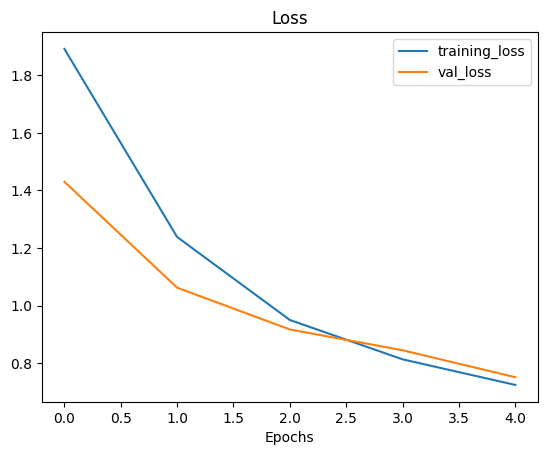

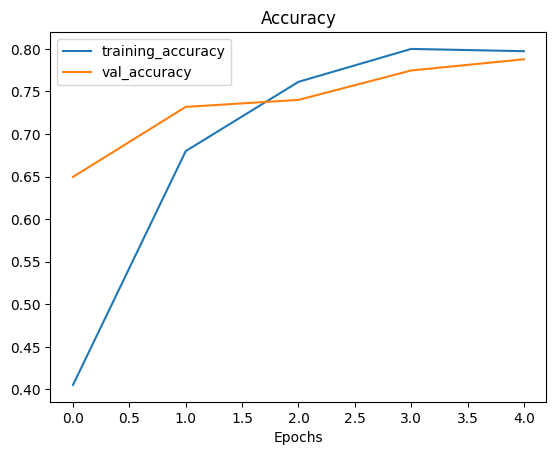

In [37]:
helper.plot_loss_curves(history_2)

In [38]:
model_2.evaluate(test_data)

79/79 [==============================] - 44s 549ms/step - loss: 0.7488 - accuracy: 0.7904


[0.748773455619812, 0.7904000282287598]

In [48]:
model_2.load_weights(checkpoint_path)

## Model 3: Fine-tuning an existing model on 10% data with data augmentation

In [49]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True
    

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [50]:
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)
    
len(model_2.trainable_variables)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block3a_expand_conv False
34 block3a_expand_bn False
35 block3a_expand_activation False
36 block3a_project_conv False
3

18

In [51]:
history_3 = model_2.fit(
    train_data_10_percent,
    epochs=EPOCHS + 5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[helper.create_tensorboard_callback("05_transfer_learning_fine_tuning", "model_3_10_percent_data_aug")],
    initial_epoch=history_2.epoch[-1],
)

Saving TensorBoard log files to: 05_transfer_learning_fine_tuning/model_3_10_percent_data_aug/20240112-232255
Epoch 5/10
24/24 [==============================] - 29s 1s/step - loss: 0.6304 - accuracy: 0.8120 - val_loss: 0.6648 - val_accuracy: 0.7993
Epoch 6/10
24/24 [==============================] - 26s 1s/step - loss: 0.5209 - accuracy: 0.8267 - val_loss: 0.6433 - val_accuracy: 0.8174
Epoch 7/10
24/24 [==============================] - 27s 1s/step - loss: 0.4288 - accuracy: 0.8653 - val_loss: 0.6274 - val_accuracy: 0.7961
Epoch 8/10
24/24 [==============================] - 24s 1s/step - loss: 0.3892 - accuracy: 0.8840 - val_loss: 0.6572 - val_accuracy: 0.7977
Epoch 9/10
24/24 [==============================] - 28s 1s/step - loss: 0.3450 - accuracy: 0.8933 - val_loss: 0.6715 - val_accuracy: 0.7895
Epoch 10/10
24/24 [==============================] - 27s 1s/step - loss: 0.3322 - accuracy: 0.8947 - val_loss: 0.5411 - val_accuracy: 0.8207


In [52]:
model_2.evaluate(test_data)

79/79 [==============================] - 44s 558ms/step - loss: 0.5801 - accuracy: 0.8060


[0.5800700187683105, 0.8059999942779541]

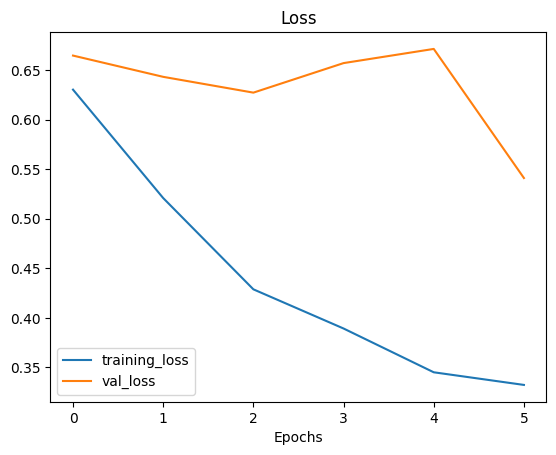

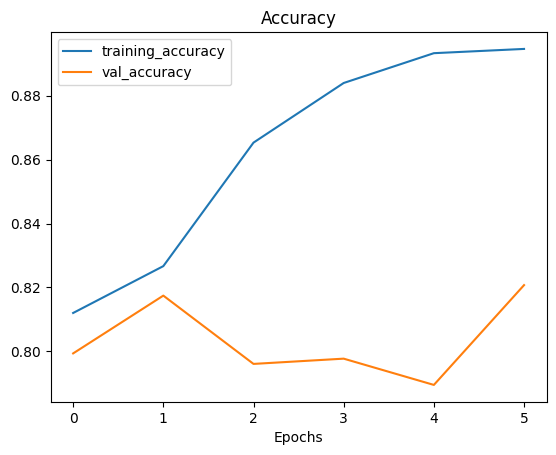

In [53]:
helper.plot_loss_curves(history_3)

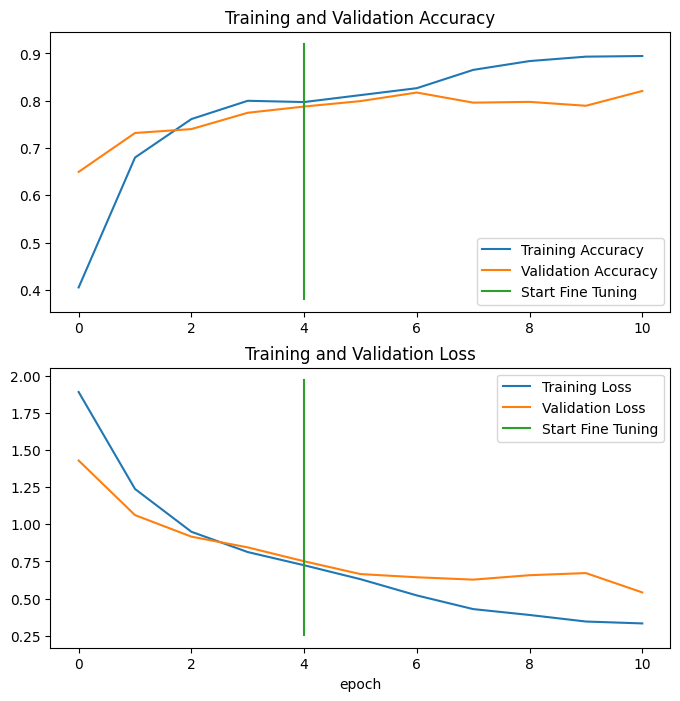

In [54]:
helper.compare_historys(original_history=history_2, new_history=history_3, initial_epochs=EPOCHS)

## Training on all data (10 classes)

In [55]:
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

helper.walk_through_dir(train_dir_all_data)


There are 10 directories and 0 images in '10_food_classes_all_data/train/'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.


In [56]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir_all_data,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [57]:
model_2.load_weights(checkpoint_path)

In [58]:
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [60]:
history_4 = model_2.fit(
    train_data_10_classes_full,
    epochs=EPOCHS + 5,
    steps_per_epoch=len(train_data_10_classes_full),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[helper.create_tensorboard_callback("05_transfer_learning_fine_tuning", "model_4_full_10_classes_fine_tuned")],
    initial_epoch=history_2.epoch[-1]
)

Saving TensorBoard log files to: 05_transfer_learning_fine_tuning/full_10_classes_fine_tuned/20240112-232658
Epoch 5/10
235/235 [==============================] - 161s 683ms/step - loss: 0.6538 - accuracy: 0.7868 - val_loss: 0.4250 - val_accuracy: 0.8553
Epoch 6/10
235/235 [==============================] - 156s 664ms/step - loss: 0.5293 - accuracy: 0.8309 - val_loss: 0.3810 - val_accuracy: 0.8750
Epoch 7/10
235/235 [==============================] - 153s 651ms/step - loss: 0.4642 - accuracy: 0.8504 - val_loss: 0.3393 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 149s 633ms/step - loss: 0.4029 - accuracy: 0.8701 - val_loss: 0.3616 - val_accuracy: 0.8947
Epoch 9/10
235/235 [==============================] - 148s 628ms/step - loss: 0.3567 - accuracy: 0.8844 - val_loss: 0.2855 - val_accuracy: 0.9062
Epoch 10/10
235/235 [==============================] - 163s 694ms/step - loss: 0.3153 - accuracy: 0.8971 - val_loss: 0.3517 - val_accuracy: 0.8832


In [63]:
model_2.evaluate(test_data)

79/79 [==============================] - 47s 589ms/step - loss: 0.3379 - accuracy: 0.8876


[0.3379181921482086, 0.8876000046730042]

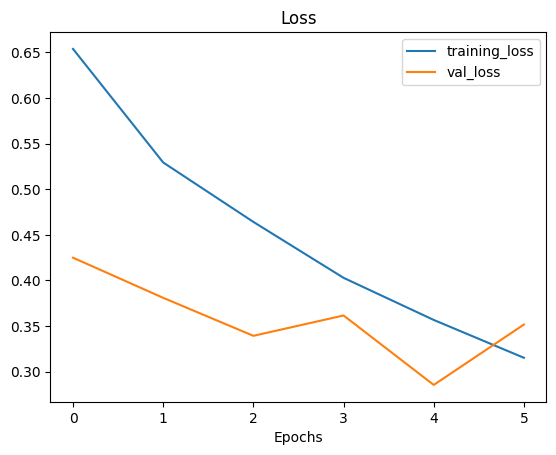

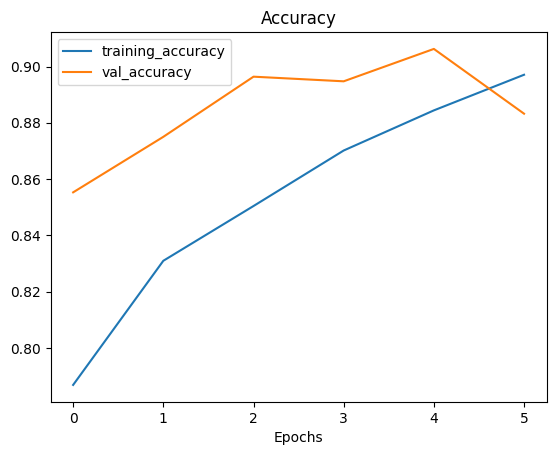

In [61]:
helper.plot_loss_curves(history_4)

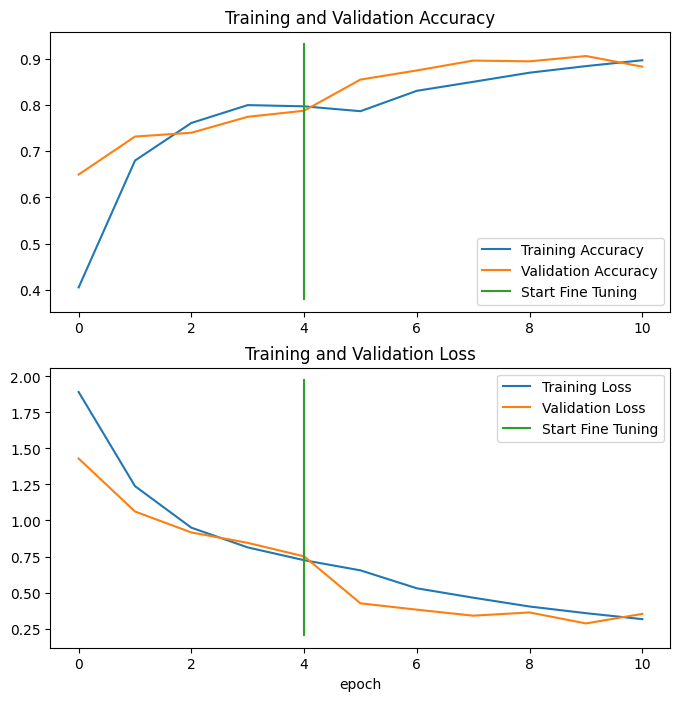

In [62]:
helper.compare_historys(original_history=history_2, new_history=history_4, initial_epochs=EPOCHS)

In [ ]:
# %tensorboard --logdir 05_transfer_learning_fine_tuning